# Example: Feature ROI Analysis

This notebook demonstrates a simple ROI calculation for a product feature.

**Use this as a learning example** - you can modify the numbers and run each cell to see results update immediately.

## 1. Setup

First, import the libraries we need:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make visualizations look nice
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("Libraries loaded successfully!")

Libraries loaded successfully!


## 2. Define Assumptions

Let's analyze building a new reporting dashboard feature.

In [2]:
# Development Costs
dev_weeks = 6
dev_cost_per_week = 8000
design_cost = 15000
qa_cost = 10000

total_dev_cost = (dev_weeks * dev_cost_per_week) + design_cost + qa_cost

print(f"Total Development Cost: ${total_dev_cost:,.0f}")
print(f"  - Engineering ({dev_weeks} weeks): ${dev_weeks * dev_cost_per_week:,.0f}")
print(f"  - Design: ${design_cost:,.0f}")
print(f"  - QA: ${qa_cost:,.0f}")

Total Development Cost: $73,000
  - Engineering (6 weeks): $48,000
  - Design: $15,000
  - QA: $10,000


In [3]:
# Revenue Assumptions
current_customers = 500
expected_new_customers_year1 = 75  # Feature helps close deals
avg_annual_revenue_per_customer = 2400
churn_reduction = 0.05  # 5% reduction in churn rate

# Calculate benefits
new_customer_revenue = expected_new_customers_year1 * avg_annual_revenue_per_customer
retained_customer_revenue = current_customers * churn_reduction * avg_annual_revenue_per_customer

total_year1_benefit = new_customer_revenue + retained_customer_revenue

print(f"Year 1 Revenue Impact: ${total_year1_benefit:,.0f}")
print(f"  - New customers: ${new_customer_revenue:,.0f}")
print(f"  - Reduced churn: ${retained_customer_revenue:,.0f}")

Year 1 Revenue Impact: $240,000
  - New customers: $180,000
  - Reduced churn: $60,000


## 3. Calculate ROI

In [4]:
# Calculate ROI
net_benefit = total_year1_benefit - total_dev_cost
roi_percentage = (net_benefit / total_dev_cost) * 100
payback_months = (total_dev_cost / total_year1_benefit) * 12

print(f"\n=== ROI ANALYSIS ===")
print(f"Investment: ${total_dev_cost:,.0f}")
print(f"Year 1 Return: ${total_year1_benefit:,.0f}")
print(f"Net Benefit: ${net_benefit:,.0f}")
print(f"\nROI: {roi_percentage:.1f}%")
print(f"Payback Period: {payback_months:.1f} months")


=== ROI ANALYSIS ===
Investment: $73,000
Year 1 Return: $240,000
Net Benefit: $167,000

ROI: 228.8%
Payback Period: 3.6 months


## 4. Visualize 3-Year Projection

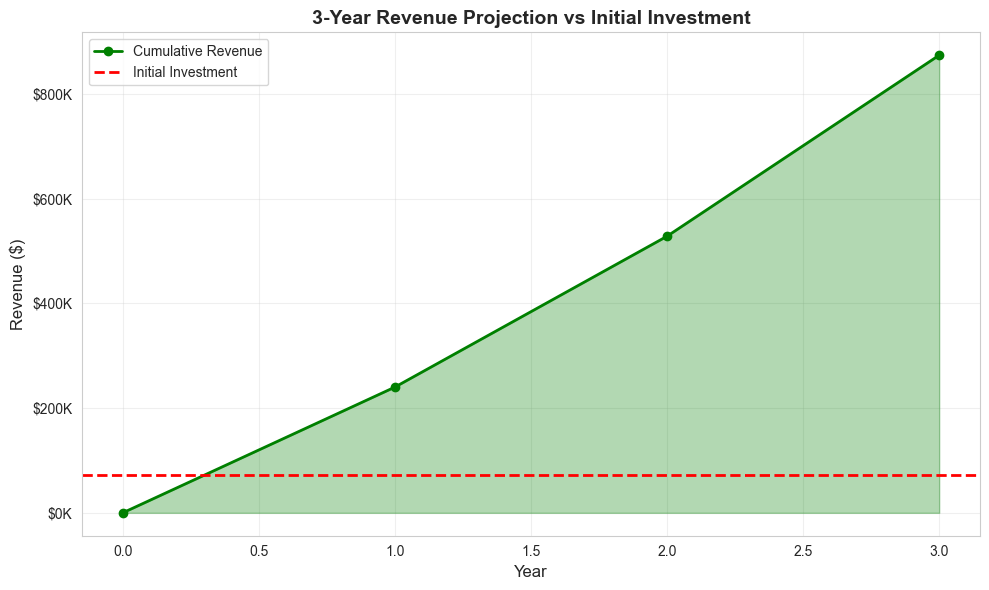


Year 3 cumulative revenue: $873,600
3-year ROI: 1096.7%


In [5]:
# Project revenue over 3 years
years = [0, 1, 2, 3]
cumulative_revenue = [0]

for year in range(1, 4):
    # Assume benefit grows 20% each year as feature adoption increases
    year_benefit = total_year1_benefit * (1.2 ** (year - 1))
    cumulative_revenue.append(cumulative_revenue[-1] + year_benefit)

# Create DataFrame for easy plotting
df = pd.DataFrame({
    'Year': years,
    'Cumulative Revenue': cumulative_revenue,
    'Investment': [total_dev_cost] * len(years)
})

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Cumulative Revenue'], marker='o', linewidth=2, label='Cumulative Revenue', color='green')
plt.axhline(y=total_dev_cost, color='red', linestyle='--', linewidth=2, label='Initial Investment')
plt.fill_between(df['Year'], 0, df['Cumulative Revenue'], alpha=0.3, color='green')

plt.xlabel('Year', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.title('3-Year Revenue Projection vs Initial Investment', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# Format y-axis as currency
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1000:.0f}K'))

plt.tight_layout()
plt.show()

print(f"\nYear 3 cumulative revenue: ${cumulative_revenue[-1]:,.0f}")
print(f"3-year ROI: {((cumulative_revenue[-1] - total_dev_cost) / total_dev_cost * 100):.1f}%")

## 5. Sensitivity Analysis

What if our assumptions are wrong? Let's see how ROI changes with different numbers of new customers.


Sensitivity Analysis: Impact of Customer Acquisition
    Scenario  New Customers  Year 1 Revenue      ROI %
Conservative             50        180000.0 146.575342
    Expected             75        240000.0 228.767123
  Optimistic            100        300000.0 310.958904


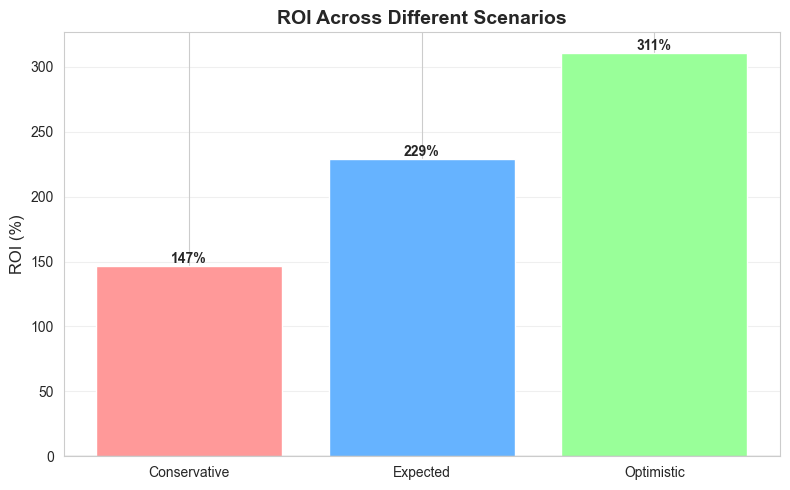

In [6]:
# Test different scenarios
scenarios = {
    'Conservative': 50,
    'Expected': 75,
    'Optimistic': 100
}

results = []

for scenario, new_customers in scenarios.items():
    revenue = (new_customers * avg_annual_revenue_per_customer) + retained_customer_revenue
    roi = ((revenue - total_dev_cost) / total_dev_cost) * 100
    results.append({
        'Scenario': scenario,
        'New Customers': new_customers,
        'Year 1 Revenue': revenue,
        'ROI %': roi
    })

results_df = pd.DataFrame(results)

print("\nSensitivity Analysis: Impact of Customer Acquisition")
print("=" * 60)
print(results_df.to_string(index=False))

# Visualize
plt.figure(figsize=(8, 5))
bars = plt.bar(results_df['Scenario'], results_df['ROI %'], color=['#ff9999', '#66b3ff', '#99ff99'])
plt.ylabel('ROI (%)', fontsize=12)
plt.title('ROI Across Different Scenarios', fontsize=14, fontweight='bold')
plt.axhline(y=0, color='black', linewidth=0.8)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.0f}%',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

## 6. Summary

**Key Takeaways:**
- Even in the conservative scenario, the feature pays for itself within the first year
- The expected ROI is positive, making this a good investment
- The feature becomes increasingly valuable over time as adoption grows

**Try This:**
1. Go back to cell 2 or 3 and change the numbers
2. Click "Run" (or press Shift+Enter) to re-execute that cell
3. Then run the cells below it to see updated calculations and charts

This is the power of Jupyter - instant feedback on your analysis!